In [12]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
# Load the Titanic dataset
titanic_train = '/Users/theranmeadows/Desktop/titanic_project/data/train.csv'
data = pd.read_csv(titanic_train)

In [14]:

# Display the first few rows to understand the structure
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1]:
# Drop non-numeric and non-relevant columns
data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

NameError: name 'data' is not defined

In [16]:
# Handle missing values, e.g., fill with the median or mode
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/var/folders/s0/wl7p7mcx5_n53vpctx2yyx180000gn/T/ipykernel_97797/3270027704.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/var/folders/s0/wl7p7mcx5_n53vpctx2yyx180000gn/T/ipykernel_97797/3270027704.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [18]:
print("Unique values in 'Sex':", data['Sex'].unique())

Unique values in 'Sex': ['male' 'female']


In [19]:
# Convert 'Sex' to numeric: 0 for 'male', 1 for 'female'
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).fillna(-1)  # Use -1 for any unexpected values

In [21]:
# Covert 'Embarked' to Numeric 'S': 1, 'C': 2, 'Q': 3
data['Embarked'] = data['Embarked'].map({'S': 1, 'C': 2, 'Q': 3}).fillna(0)  # Use 0 for missing

In [22]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [23]:
# Handle missing values for 'Age'
data['Age'].fillna(data['Age'].median(), inplace=True)

/var/folders/s0/wl7p7mcx5_n53vpctx2yyx180000gn/T/ipykernel_97797/4197518897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [28]:

# Generate a correlation matrix to see relationships between variables
correlation_matrix = data.corr()
# Display the correlation matrix
print(correlation_matrix)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.064910 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.339898  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.081163  0.114631  0.245489   
Age      -0.064910 -0.339898 -0.081163  1.000000 -0.233296 -0.172482   
SibSp    -0.035322  0.083081  0.114631 -0.233296  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.172482  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.096688  0.159651  0.216225   
Embarked  0.106811  0.045702  0.116569 -0.009165 -0.059961 -0.078665   

              Fare  Embarked  
Survived  0.257307  0.106811  
Pclass   -0.549500  0.045702  
Sex       0.182333  0.116569  
Age       0.096688 -0.009165  
SibSp     0.159651 -0.059961  
Parch     0.216225 -0.078665  
Fare      1.000000  0.062142  
Embarked  0.062142  1.000000  


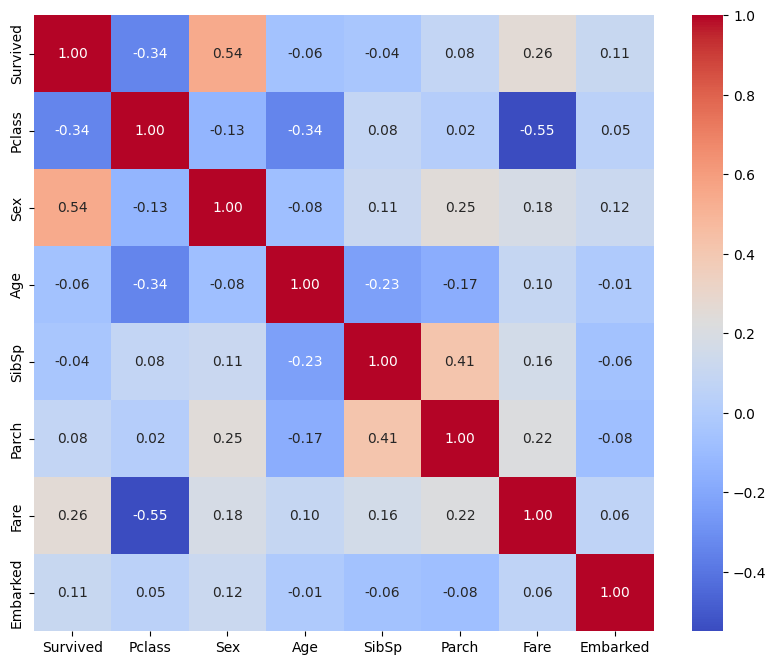

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

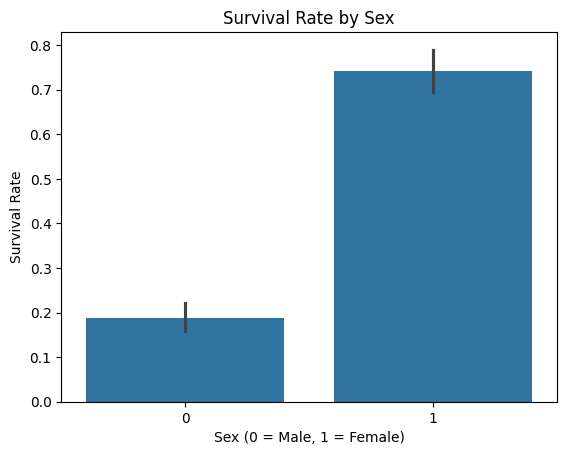

In [30]:
# EDA survivial rate by gender 

sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

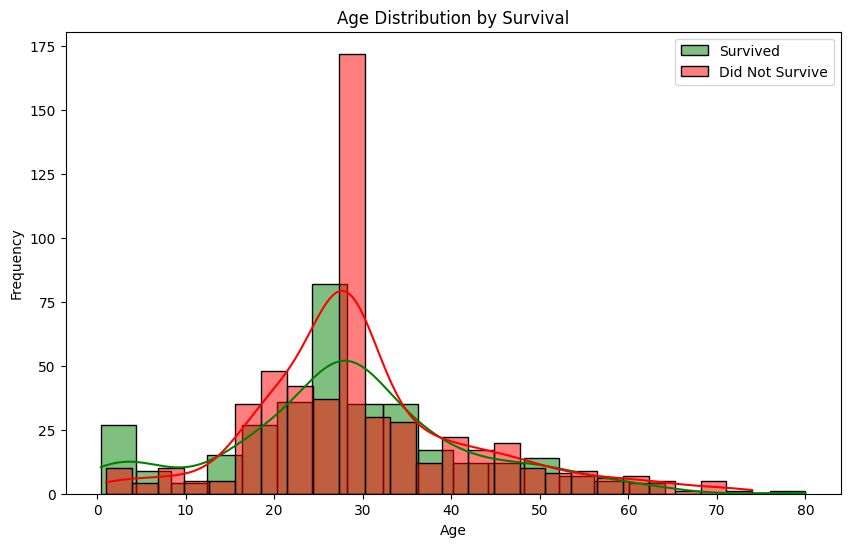

In [31]:
# EDA distribution of survived and not survived passengers

plt.figure(figsize=(10, 6))
sns.histplot(data[data['Survived'] == 1]['Age'], color='green', label='Survived', kde=True)
sns.histplot(data[data['Survived'] == 0]['Age'], color='red', label='Did Not Survive', kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

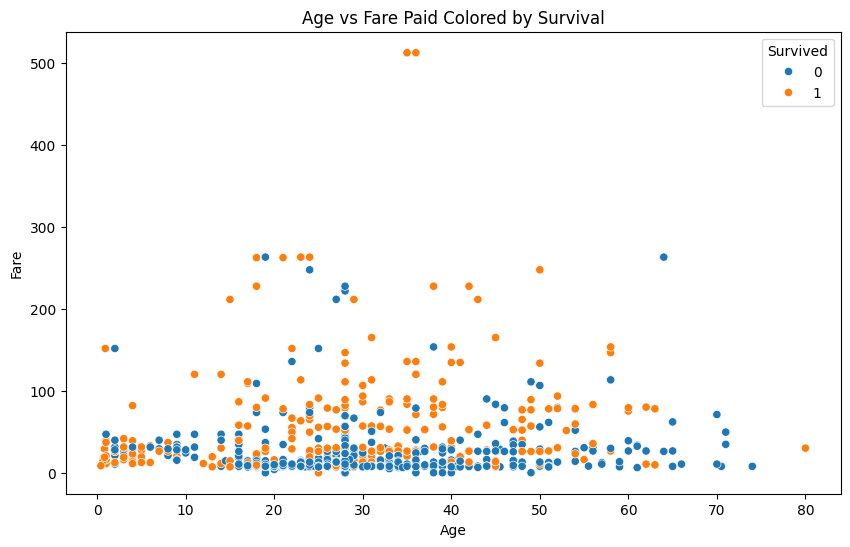

In [32]:
# EDA age vs fare price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Age vs Fare Paid Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

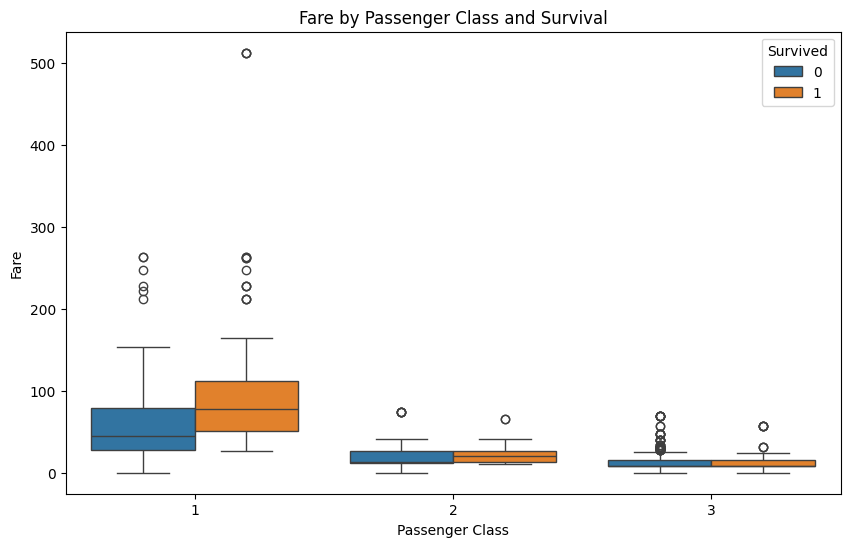

In [33]:
# EDA fare vs passenger class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data)
plt.title('Fare by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()